In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = dataset.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

In [5]:
# Define the model architecture
model = keras.Sequential([
    # Flatten layer to convert 2D input into 1D
    keras.layers.Flatten(input_shape=(28, 28)),
    # Dense layer with 128 neurons and ReLU activation function
    keras.layers.Dense(128, activation='relu'),
    # Output layer with 10 neurons and softmax activation function for classification
    keras.layers.Dense(10, activation='softmax')
])

In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Train the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4981 - accuracy: 0.8262
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3767 - accuracy: 0.8649
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3373 - accuracy: 0.8779
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3124 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2947 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2795 - accuracy: 0.8970
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2656 - accuracy: 0.9017
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2566 - accuracy: 0.9050
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2473 - accuracy: 0.9078
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.237

In [8]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.3270 - accuracy: 0.8852
Test accuracy: 0.885200023651123


1/1 [==============================] - 0s 22ms/step


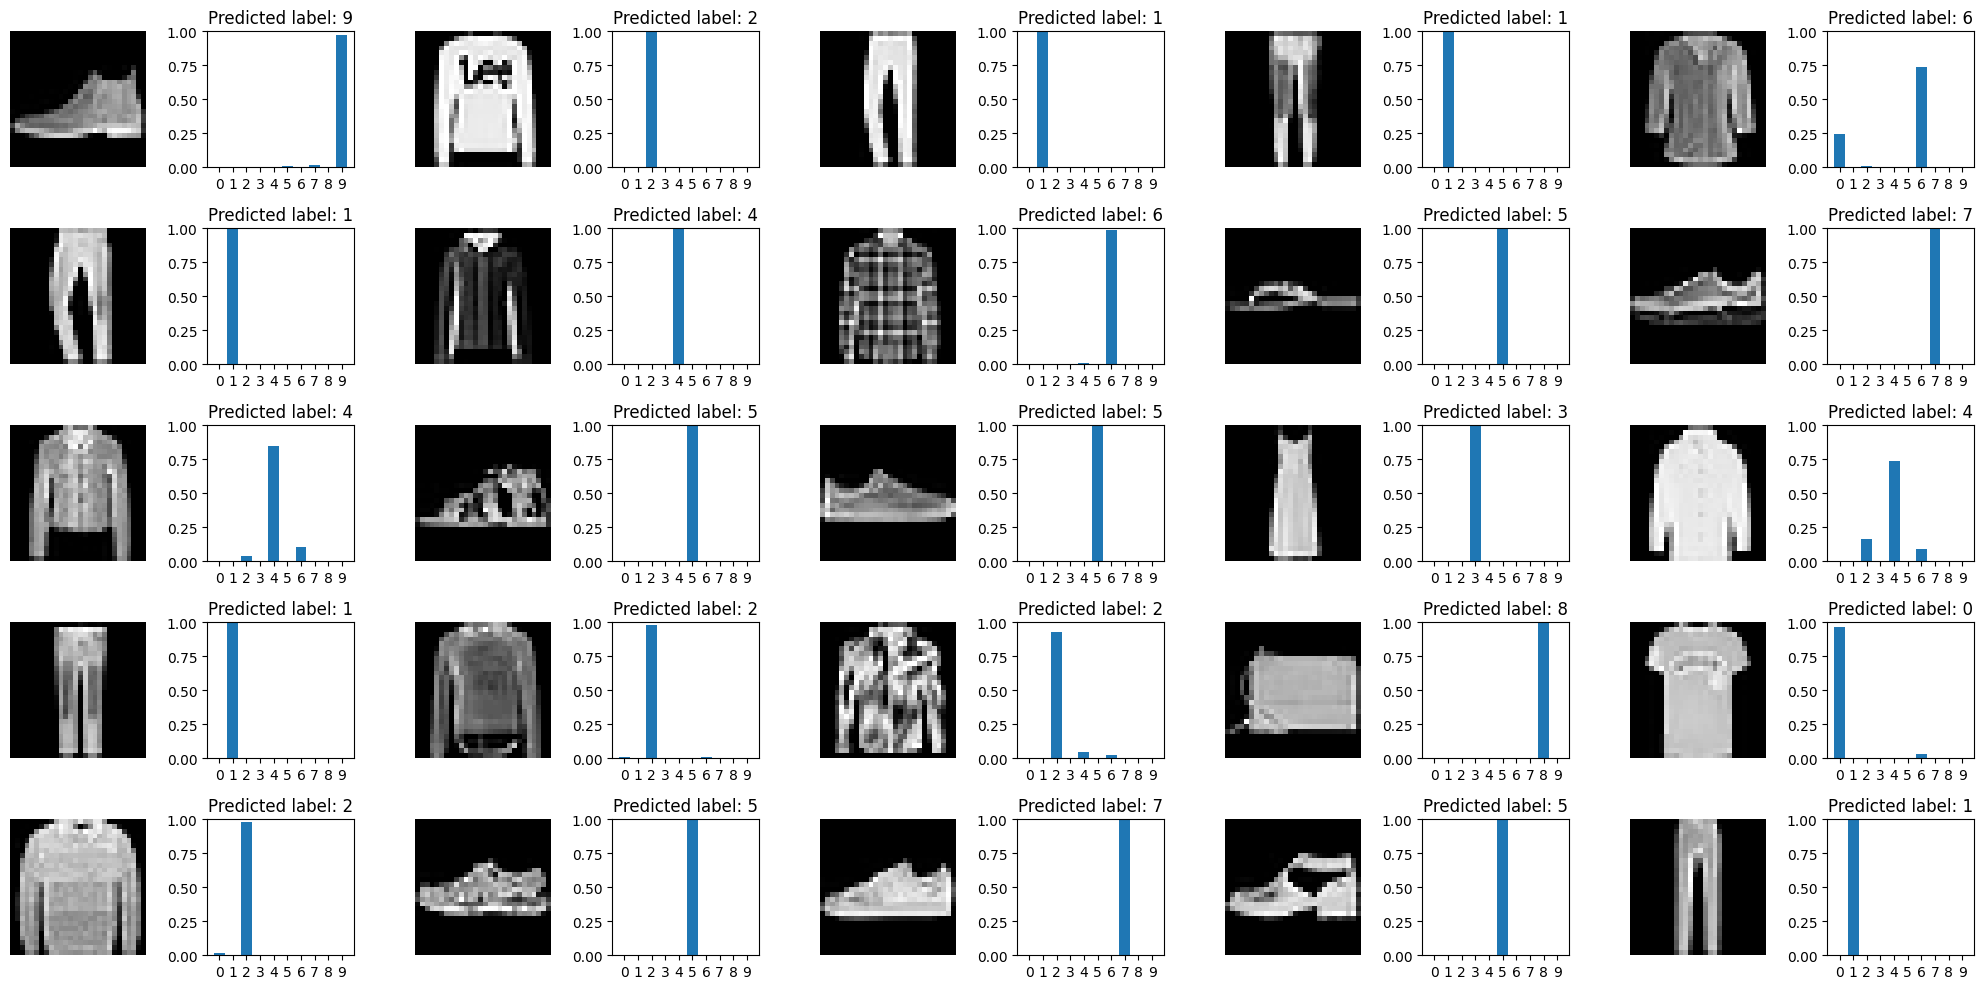

In [9]:
# Make predictions and show example images with predicted labels
num_rows = 5
num_cols = 5
num_images = num_rows * num_cols

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.axis('off')

    # Make predictions for the current image
    predictions = model.predict(np.expand_dims(test_images[i], axis=0))
    predicted_label = np.argmax(predictions)

    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plt.bar(range(10), predictions[0])
    plt.xticks(range(10))
    plt.ylim([0, 1])
    plt.title(f"Predicted label: {predicted_label}")

plt.tight_layout()
plt.show()